# Урок 3. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка. 

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов. 

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris

Напомним порядок расположения признаков в массиве данных

In [3]:
iris_dataset = load_iris()
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [4]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

a_new = np.delete(a, 0, axis=1)
a_new

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [5]:
iris_data = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_data.drop(columns=['sepal width (cm)'])

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [7]:
iris_dataset_1 = iris_data.drop(columns=['sepal width (cm)'])
iris_dataset_2 = iris_data.drop(columns=['petal width (cm)'])

### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

In [8]:
from mpl_toolkits import mplot3d

**Пример** построения трехмерного графика

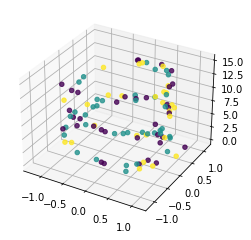

In [9]:
ax = plt.axes(projection='3d')

zdata = 15 * np.random.random(100) # точки оси Z
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # точки оси X
ydata = np.cos(zdata) + 0.1 * np.random.randn(100) # точки оси Y
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

**Примечание: для установки цвета в функции используйте *c=iris_dataset.target*.**

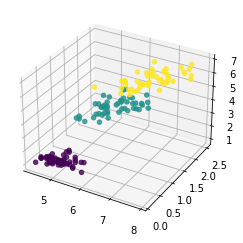

In [10]:
ax = plt.axes(projection='3d')

zdata = iris_dataset_1['petal length (cm)']
xdata = iris_dataset_1['sepal length (cm)']
ydata = iris_dataset_1['petal width (cm)']
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=iris_dataset.target)

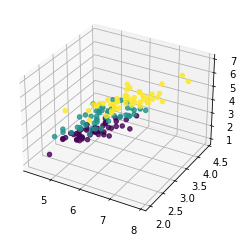

In [11]:
ax = plt.axes(projection='3d')

zdata = iris_dataset_2['petal length (cm)']
xdata = iris_dataset_2['sepal length (cm)']
ydata = iris_dataset_2['sepal width (cm)']
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=iris_dataset.target)

Провести классификацию будет легче на датасете 1.

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [13]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1, iris_dataset['target'], train_size=0.8, random_state=42)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(iris_dataset_2, iris_dataset['target'], train_size=0.8, random_state=42)

knn1 = KNeighborsClassifier(n_neighbors=5)
knn2 = KNeighborsClassifier(n_neighbors=5)

knn1.fit(x_train_1, y_train_1)
knn2.fit(x_train_2, y_train_2)



KNeighborsClassifier()

### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_1 = accuracy_score(knn1.predict(x_test_1), y_test_1)
accuracy_2 = accuracy_score(knn2.predict(x_test_2), y_test_2)

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

Accuracy_1: 1.0, accuracy_2: 0.9333333333333333


### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [16]:
accuracy = []
for n in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train_1, y_train_1)
    accuracy.append([n, accuracy_score(y_test_1, knn.predict(x_test_1))])

In [17]:
accuracy

[[1, 1.0],
 [2, 1.0],
 [3, 1.0],
 [4, 1.0],
 [5, 1.0],
 [6, 1.0],
 [7, 1.0],
 [8, 1.0],
 [9, 1.0],
 [10, 1.0],
 [11, 1.0],
 [12, 1.0],
 [13, 1.0],
 [14, 1.0],
 [15, 1.0],
 [16, 1.0],
 [17, 1.0],
 [18, 1.0],
 [19, 1.0],
 [20, 1.0]]

In [22]:
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier()

# зададим сетку параметров
param_grid = {
    'n_neighbors': np.arange(1, 5)
}

# создадим объект GridSearchCV
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

# запустим поиск
search.fit(x_train_1, y_train_1)

# выведем наилучшие параметры
print(search.best_params_)


{'n_neighbors': 3}


In [23]:
accuracy_score(y_test_1, search.predict(x_test_1))

1.0

# Урок 6. Наивный байесовский классификатор

В уроке мы подробно рассмотрели, как работает наивный байесовский классификатор, на примере частотной таблицы. Такие данные на практике встречаются довольно редко (если вы не работаете с классификацией текстов), поэтому сейчас предлагаем самостоятельно разобрать принцип работы гауссовского наивного Байеса, который можно встретить чаще остальных.

### 1.
Посмотрите, что включает в себя новый датасет Wine, где собраны результаты химического анализа вин, выращенных в одном регионе Италии тремя различными культиваторами. В наборе каждый из объектов имеет 13 числовых признаков.

Изучите попарные графики признаков (в уроках мы рассматривали их с помощью функции pd.plotting.scatter_matrix() ) и выберите такие два признака, используя которые, на ваш взгляд, можно будет лучше всего разделить данные по трем классам. Помните о том, что модель гауссовского наивного Байеса использует для предсказаний среднее и разброс значений признаков относительно среднего, поэтому вероятнее всего, лучшими признаками будут те, значения которых на графике разбросаны примерно одинаково от среднего значения, но как можно меньше накладываются на признаки других классов.

In [24]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns

In [25]:
wine_dataset = load_wine()

In [26]:
wine = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
wine['class'] = wine_dataset.target
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [27]:
X = wine.iloc[:,:-1]
y = wine.iloc[:,-1]

<Figure size 1800x1800 with 0 Axes>

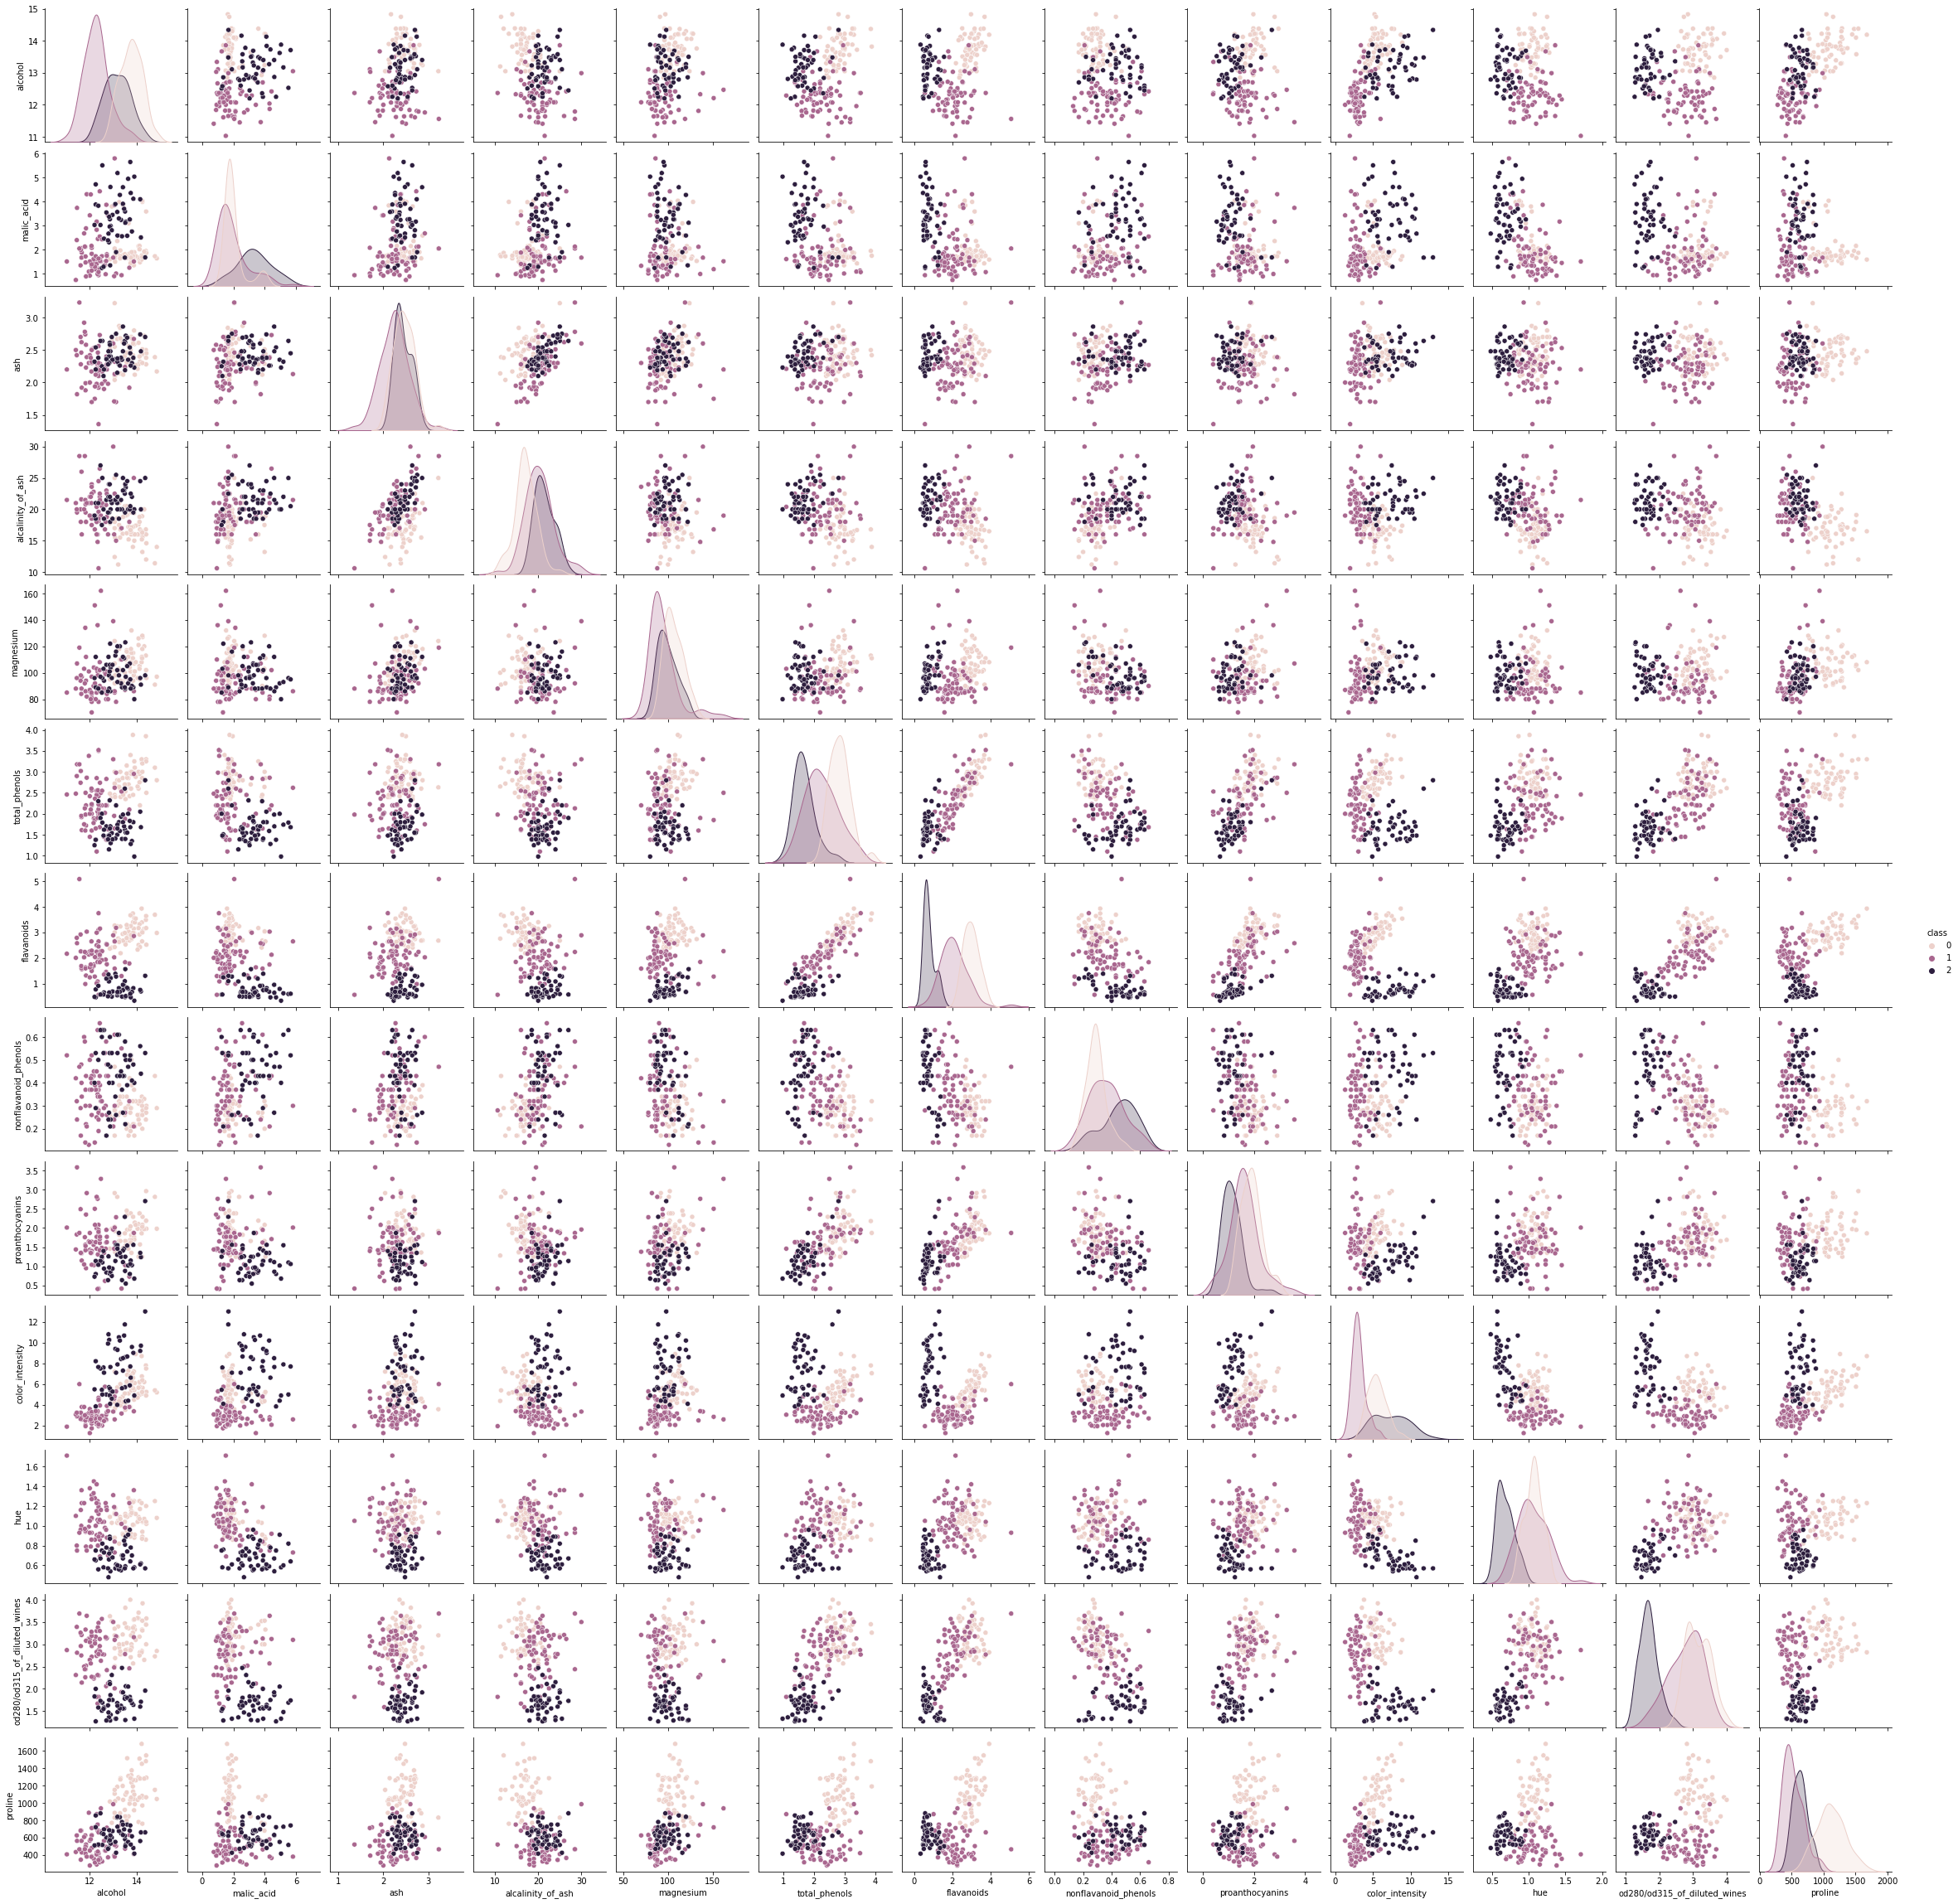

In [28]:
plt.figure(figsize=(25, 25))
sns.pairplot(wine, hue='class') 
plt.tick_params(labelsize=16)
plt.show()

In [44]:
# выберем фичи alcohol и flavanoids
X = wine[['alcohol', 'flavanoids']]
y = wine['class']

### 2.
Разбейте данные на тренировочный и тестовый датасеты (при разбиении используйте параметр random_state=17 для воспроизводимости результатов) и постройте модель на двух выбранных признаках. Используя встроенную функцию *score()*, проверьте точность работы модели. Если score() меньше 0.88..., выберите по графику другие два признака и постройте модель на них. Укажите номера признаков, которые вы использовали (помните, что индекс массива признаков начинается с 0).

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [47]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [48]:
clf.score(X_test, y_test)

0.9444444444444444

### 3.
Еще раз обучите модель на признаках с номерами 11, 12, предварительно снова разбив данные на тренировочные и тестовые (с random_state=17). С помощью функции predict_proba() посмотрите, какие вероятности были вычислены для каждого из классов, и выведите эти вероятности для объекта x_test[0].

In [54]:
X = wine.iloc[:, 11:13]
y = wine['class']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [58]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [59]:
y_predict = clf.predict_proba(X_test)

In [66]:
y_predict[0]

array([3.94150380e-03, 9.95927916e-01, 1.30580049e-04])

In [68]:
# c вероятностью 0.9959 объект x_test[0] относится к class 1

# Урок 8. Деревья решений.

В уроках мы разбирали на небольшом наборе данных деревья решений без настройки гиперпараметров. Здесь предлагаем вам рассмотреть работу классификатора на более сложном датасете, применив настройку гиперпараметров.

### 1.
На датасете из предыдущего урока - load_wine() - обучите дерево решений (DecisionTreeClassifier).

*Примечание: при установке гиперпараметров модели и разбиении на тренировочный и тестовый датасеты используйте random_state=17 для воспроизводимости результатов.*

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [92]:
X = wine_dataset.data
y = wine_dataset.target

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [103]:
dtc = DecisionTreeClassifier(random_state=17)
dtc_model = dtc.fit(X_train, y_train)

### 2.
Отобразите дерево с помощью библиотеки graphviz.

*Примечание: если, изучая урок, вы не установили библиотеку graphviz, то необходимо сделать это сейчас.*

In [104]:
from sklearn import tree
import graphviz

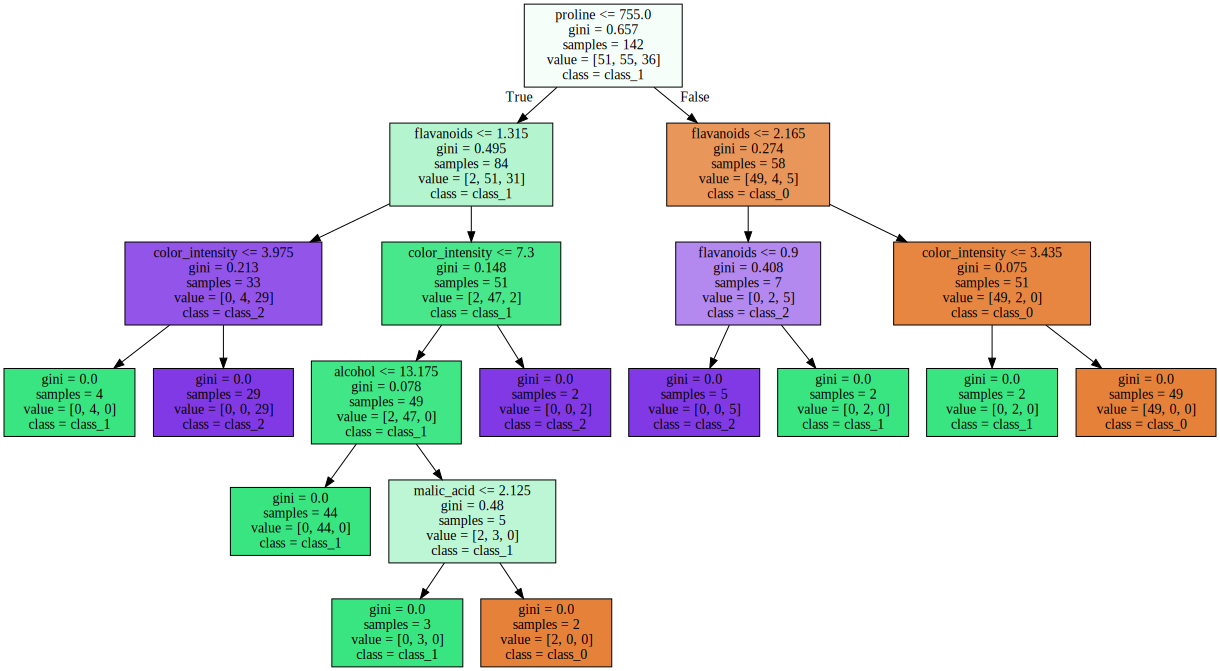

In [105]:
def print_graph(data):
    dot_data = tree.export_graphviz(data, out_file=None,
                                    feature_names=wine_dataset.feature_names[0:14],  
                                    class_names=wine_dataset.target_names,  
                                    filled=True)  
    return graphviz.Source(dot_data)  

print_graph(dtc_model)

### 3.
Используя полученную модель, сделайте прогноз для тестовой выборки данных и, пользуясь встроенной функцией score(), определите точность модели.

In [106]:
dtc.score(X_test, y_test)

0.9722222222222222

Теперь попробуем сделать начальную настройку гиперпараметров и посмотреть, что из этого выйдет. 

### 4.

Постройте модель, указав гиперпараметр max_features равным 2 (так же указав random_state=17) и, сделав прогноз на тестовых данных, определите, стала ли модель работать точнее.

*Примечание: гиперпараметр max_features показывает модели, сколько различных признаков необходимо использовать каждый раз при принятии решения о разделении. То есть если, допустим, у вас имеются 50 признаков, а max_features=10, то в каждом узле случайным образом выбираются 10 признаков, которые будут использоваться для поиска лучшего разделения.*

In [110]:
dtc_2 =  DecisionTreeClassifier(max_features=2, random_state=17)
dtc_model_2 = dtc_2.fit(X_train, y_train)

In [111]:
dtc_2.score(X_test, y_test) # модель стала менее точной

0.9444444444444444

### 5.
Теперь постройте граф дерева решений, используя graphviz.

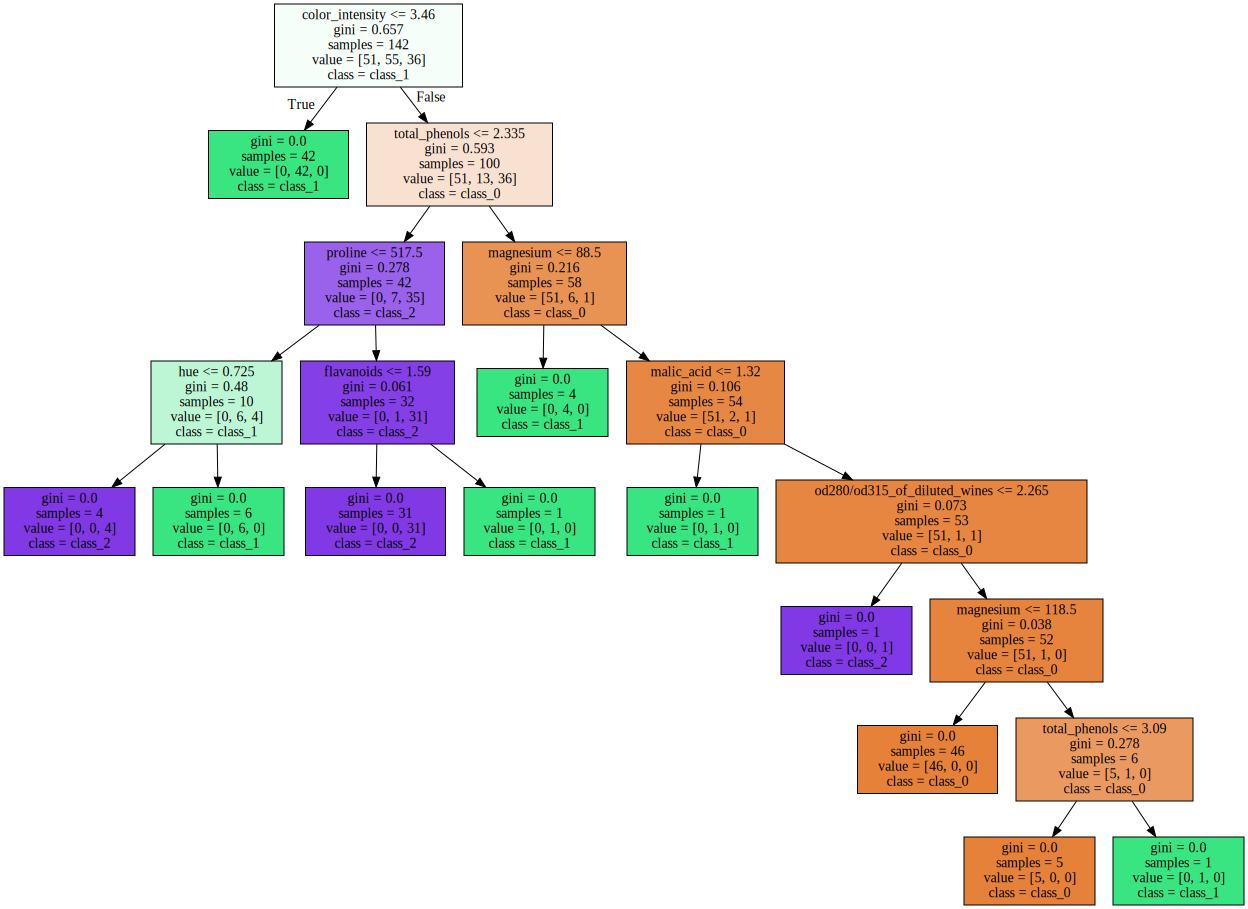

In [112]:
print_graph(dtc_model_2)

Так как главная задача модели - способность обобщаться на новые данные, то для подбора оптимальных гиперпараметров надо пожертвовать небольшой порцией данных, чтобы на ней во время обучения проверять качество модели.

Часто для этого используют кросс-валидацию: модель обучается K раз на (K-1) подвыборках исходной выборки, а на одной подвыборке проверяется (каждый раз на разной). Получаются K оценок качества модели, которые обычно усредняются, давая среднюю оценку.

Кросс-валидация применяется для подбора гиперпараметров модели в методе GridSearchCV(): для каждой уникальной совокупности значений параметров проводится кросс-валидация и выбирается лучшее сочетание параметров.

### 6.
Используя обученное в предыдущем задании дерево решений, настройте параметры max_depth и max_features на 5-кратной валидации с помощью GridSearchCV. Для этого в функцию GridSearchCV передайте параметры (tree, tree_params, cv=5).

*Примечание: tree здесь - не обученная модель, а объект, который инкапсулирует алгоритм. Например, в уроке мы его обозначали как dtc.*

In [113]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [119]:
tree_params = {'max_depth': range(1, 6), 
               'max_features': range(1, 10)}
clf_dtc = DecisionTreeClassifier(random_state=17)
tree_grid = GridSearchCV(estimator=clf_dtc, param_grid=tree_params, cv=5)

### 7.
С помощью метода tree_grid.fit() постройте модель на тренировочных данных и выведите лучшее сочетание параметров с помощью метода tree_grid.best_params_.

In [120]:
tree_grid.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': range(1, 6),
                         'max_features': range(1, 10)})

In [121]:
tree_grid.best_params_

{'max_depth': 5, 'max_features': 2}

### 8.
С помощью полученной модели сделайте прогноз - predict - для тестовой выборки и выведите долю верных ответов, проверив точность модели, используя функцию accuracy_score.

In [124]:
predicted = tree_grid.predict(X_test)
accuracy = accuracy_score(predicted, y_test)

print(f'accuracy = {accuracy}')

accuracy = 0.9722222222222222
